In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from google.colab import drive
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve

In [2]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [12]:
path = "/content/drive/MyDrive/SMLB/wildfire_train.csv"
raw_dataset = pd.read_csv(path)

In [13]:
df = raw_dataset.dropna()

In [14]:
df.reset_index(inplace=True)
df.head()

,index,Unnamed: 0,date,forest_area1,avg_dry_bulb_temperature,avg_dew_point,avg_relative_humidity,avg_rain_mm,avg_snow_cm,avg_hail_mm,...,avg_ffmc,avg_dmc,avg_dc,avg_isi,avg_bui,avg_fwi,avg_edr,is_fire,is_fire_tmrw,is_fire_2days
0,52,139,1984-05-19,Edson,9.444444,1.055556,57.166667,0.037222,0.0,0.0,...,76.791667,6.650000,60.100000,2.100000,9.608333,1.933333,0.135833,0,0,0
1,53,140,1984-05-30,Edson,13.888889,3.777778,53.944444,1.151667,0.0,0.0,...,76.943750,16.762500,85.412500,3.981250,21.262500,5.962500,0.955625,0,0,0
2,61,148,1984-08-09,Edson,22.166667,9.111111,44.388889,0.000000,0.0,0.0,...,87.576471,28.152941,288.517647,5.558824,44.435294,12.758824,2.838824,0,0,0
3,63,150,1985-05-15,Edson,13.600000,-3.600000,31.133333,0.001333,0.0,0.0,...,86.571429,33.928571,90.000000,4.071429,35.500000,9.071429,1.569286,0,0,0
4,66,153,1985-06-03,Edson,12.294118,2.000000,50.058824,0.005882,0.0,0.0,...,80.250000,18.750000,108.875000,2.906250,25.875000,5.687500,0.727500,0,0,0


In [27]:
df["date"].head()

0    1984-05-19
1    1984-05-30
2    1984-08-09
3    1985-05-15
4    1985-06-03
Name: date, dtype: object

In [6]:
date_series = pd.to_datetime(df.pop("date"), infer_datetime_format=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
df.set_index("date", inplace=True)

In [9]:
date_df = df["is_fire"]

In [10]:
date_df.head()

date
1984-05-19    0
1984-05-30    0
1984-08-09    0
1985-05-15    0
1985-06-03    0
Name: is_fire, dtype: int64

In [30]:
timestamp_s = date.map(pd.Timestamp.timestamp)

In [31]:
timestamp_s.head()

0    453772800.0
1    454723200.0
2    460857600.0
3    484963200.0
4    486604800.0
Name: date, dtype: float64

In [12]:
import tensorflow as tf

In [16]:
day = 24*60*60
year = 365.2425*day

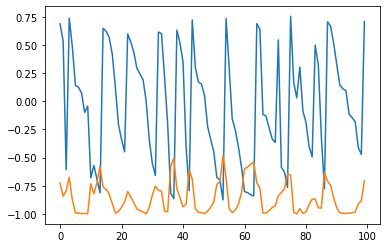

In [33]:
year_sin = np.sin(timestamp_s * (2 * np.pi / year))
year_cos = np.cos(timestamp_s * (2 * np.pi / year))

plt.plot(year_sin[:100])
plt.plot(year_cos[:100])

In [21]:
date[:10]

52   1984-05-19
53   1984-05-30
61   1984-08-09
63   1985-05-15
66   1985-06-03
69   1985-06-24
70   1985-06-25
71   1985-06-28
72   1985-07-08
79   1986-07-05
Name: date, dtype: datetime64[ns]

In [35]:
f = abs(np.fft.fft(timestamp_s))

In [39]:
num = len(timestamp_s)

In [41]:
freq = [i / num for i in list(range(num))]

In [43]:
spectrum = f.real*f.real+f.imag*f.imag
nspectrum=spectrum/spectrum[0]

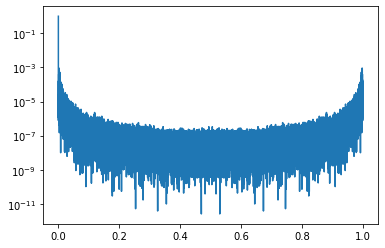

In [44]:
plt.semilogy(freq, nspectrum)

In [45]:
period = np.array(freq) * 52

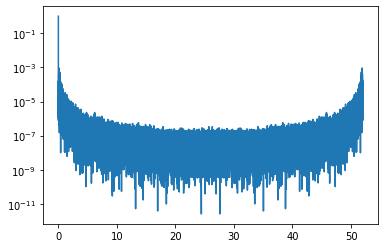

In [46]:
plt.semilogy(period, nspectrum)

In [50]:
df2 = df[["date", "is_fire"]]

KeyError: ignored

In [11]:
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(date_df)
resplot = res.plot()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ValueError: ignored